In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas.util.testing as tm

C:\Users\sibin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading dataset
data1 = pd.read_csv(r"C:\Users\sibin\Desktop\udacity\greenvehicle\data\vehicle_08.csv")
data2 =pd.read_csv(r"C:\Users\sibin\Desktop\udacity\greenvehicle\data\vehicle_18.csv")

In [3]:
data1.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [4]:
data2.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [5]:
data1.info()
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [6]:
#checking for duplicates in dataframe
print(data1.duplicated().sum())
print(data2.duplicated().sum())

25
0


In [7]:
# removing duplicates
data1.drop_duplicates(inplace = True)

In [8]:
data1.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [9]:
print(data1.duplicated().sum())
print(data2.duplicated().sum())

0
0


Hanling missing variables

In [10]:
mis1 = data1.isnull().sum()
mis1 = mis1.drop(mis1[mis1== 0].index).sort_values(ascending = False)[:30]
missing1 = pd.DataFrame({'Missing Value':mis1})
missing1

,Missing Value
Greenhouse Gas Score,180
Unadj Cmb MPG,180
Cmb MPG,180
Hwy MPG,180
City MPG,180
FE Calc Appr,180
Trans,180
Cyl,180
Drive,74


Text(0.5, 1.0, ' Missing Data by Featue')

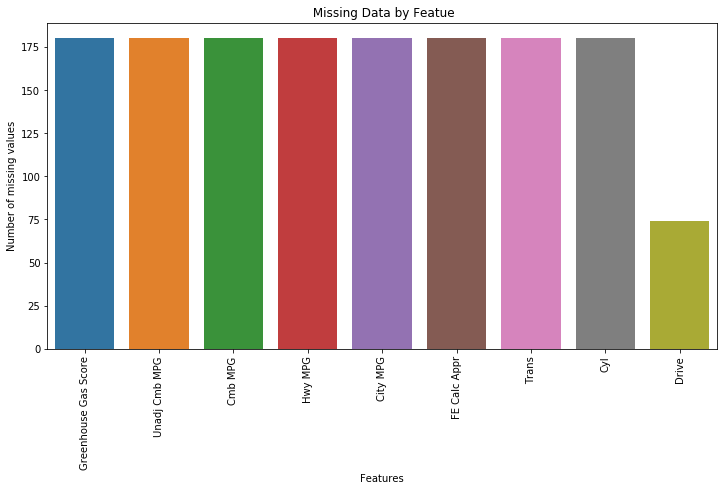

In [11]:
#ploting missing values

f, ax = plt.subplots(figsize = (12,6))
plt.xticks(rotation='90')

sns.barplot(x= mis1.index , y = mis1)

plt.xlabel('Features')
plt.ylabel('Number of missing values')
plt.title(" Missing Data by Featue")

In [12]:
mis2 = data2.isnull().sum()
mis2 = mis2.drop(mis2[mis2== 0].index).sort_values(ascending = False)[:30]
missing2 = pd.DataFrame({'Missing Value':mis2})

missing2

,Missing Value
Cyl,2
Displ,2


In [13]:
# droping unwanted columns 
data_08 = data1.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis =1)
data_18 = data2.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis =1)

In [14]:
# rename 2018 coloumn 'cert region' with 'sales region'
data_08 = data_08.rename(columns = {'Sales Area' : 'Cert_region'})
data_18 = data_18.rename(columns = {'Cert Region' : 'Cert_region'})

In [15]:
#For consistency, only compare cars certified by California standards.

data_08 = data_08.query('Cert_region == "CA"')
data_18 = data_18.query('Cert_region == "CA"')

Handling of missing values

In [19]:
# drop the rows that have a missing value, as the missing values are so less
data_08.dropna(inplace = True)
data_18.dropna(inplace = True)

In [20]:
data_08.info()
data_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1006 non-null   object 
 1   Displ                 1006 non-null   float64
 2   Cyl                   1006 non-null   object 
 3   Trans                 1006 non-null   object 
 4   Drive                 1006 non-null   object 
 5   Fuel                  1006 non-null   object 
 6   Cert_region           1006 non-null   object 
 7   Veh Class             1006 non-null   object 
 8   Air Pollution Score   1006 non-null   object 
 9   City MPG              1006 non-null   object 
 10  Hwy MPG               1006 non-null   object 
 11  Cmb MPG               1006 non-null   object 
 12  Greenhouse Gas Score  1006 non-null   object 
 13  SmartWay              1006 non-null   object 
dtypes: float64(1), object(13)
memory usage: 117.9+ KB
<class 'pandas.core.fr

NameError: name 'x' is not defined